In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [62]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [63]:
df.shape

(42000, 785)

In [64]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [65]:
import matplotlib.pyplot as plt

In [66]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
7767      3       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
7767       0  ...         0         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  
7767         0         0         0         0  

[1 rows x 785 columns]

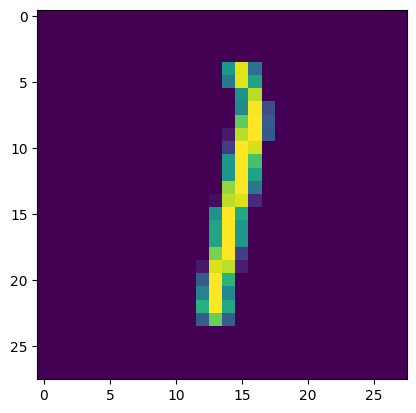

In [69]:
plt.imshow(df.iloc[35368,1:].values.reshape(28,28))

In [70]:
X = df.iloc[:,1:]
y =df.iloc[:,0]

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [72]:
X_train.shape

(33600, 784)

In [73]:
y_train.shape

(33600,)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [77]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [78]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

13.967138528823853


In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [82]:
# use pca 
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [84]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [103]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)

In [104]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [105]:
X_train_trf.shape

(33600, 100)

In [106]:
knn = KNeighborsClassifier()

In [107]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [109]:
y_pred = knn.predict(X_test_trf)

In [111]:
accuracy_score(y_test,y_pred)

0.9542857142857143

In [114]:
for i in range(1,785):
    pca=PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred = knn.predict(X_test_trf)
    accuracy_score(y_test,y_pred)

KeyboardInterrupt: 

In [119]:
pca = PCA(n_components=2)
X_train_trf= pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [120]:
X_train_trf

array([[-2.71863253, -0.49000465],
       [-0.6769297 , -6.75400557],
       [-3.03325488,  6.5098996 ],
       ...,
       [ 2.14884456,  0.78073051],
       [ 1.05956721,  0.94774867],
       [17.70262126,  1.96180599]])

In [128]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:, 0],
                 y=X_train_trf[:, 1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)

# Show plot
fig

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [122]:
import plotly.express as px

# Assuming X_train_trf is transformed with at least 2 components
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)

# Convert y_train to string for color distinction
y_train_trf = y_train.astype(str)

# Create scatter plot
fig = px.scatter(x=X_train_trf[:, 0],
                 y=X_train_trf[:, 1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)

# Show plot
fig

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [130]:
import plotly.express as px

# Assuming X_train_trf is transformed with at least 2 components
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)

# Convert y_train to string for color distinction
y_train_trf = y_train.astype(str)

# Create scatter plot
fig = px.scatter(x=X_train_trf[:, 0],
                 y=X_train_trf[:, 1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)

# Show plot
fig

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [131]:
# transforming to 3D

pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit(X_test)

In [132]:
X_train_trf

array([[-2.71863237, -0.4900528 ,  1.13535961],
       [-0.67697731, -6.75335884, -2.33599862],
       [-3.03322575,  6.51008123,  7.49178459],
       ...,
       [ 2.14880912,  0.7811855 , -0.7474235 ],
       [ 1.05956493,  0.9469626 ,  3.94972548],
       [17.70257696,  1.96081719, -4.94311728]])

In [143]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],color = y_train_trf)
fig.update_layout(margin=dict(l=20, r=20,t=20,b=20))
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [144]:
pca.explained_variance_   # eign values 

array([273.46657865,  41.32527844,  31.02824602])

In [145]:
.pca.components_shape  # eign vector

array([[ 5.95059935e-04, -1.22615963e-04, -5.77578048e-04,
         1.23231188e-02, -4.82495705e-03,  1.01962145e-03,
         3.97587593e-03, -2.83086780e-03,  4.12770045e-03,
         2.51804583e-04, -3.66054809e-03, -1.87154767e-04,
        -1.90617097e-03, -5.39837974e-03, -1.31767295e-02,
         8.86248288e-03, -7.22050013e-03, -1.05962742e-02,
        -8.12163334e-03, -6.12616662e-03,  7.01534032e-04,
        -1.86327027e-02, -3.02918863e-03,  9.39696209e-04,
         6.12258008e-03, -3.36011830e-02,  1.05123844e-02,
         1.82519704e-02,  7.69164974e-03,  1.28981225e-02,
        -2.80361853e-02,  3.83670784e-02,  2.20903722e-02,
         1.31712107e-02,  7.45014991e-03,  1.39200182e-02,
         4.91140212e-02,  2.85578553e-02, -3.84072596e-02,
        -7.22169033e-02, -1.32156507e-02, -6.09533033e-02,
        -6.04215037e-02,  8.30263665e-02,  7.81120217e-02,
        -2.16034508e-02,  1.48308134e-01,  1.53142038e-02,
         1.34839128e-01,  5.77398435e-02, -1.16385287e-0

In [146]:
pca.explained_variance_ratio_   # these explains the 12% variance of given data

array([0.34348868, 0.05190676, 0.03897314])

In [151]:
pca= PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [152]:
pca.explained_variance_.shape

(100,)

In [158]:
import numpy as np
pca.components_.shape

(100, 100)

In [160]:
np.cumsum(pca.explained_variance_ratio_)

array([0.08051472, 0.13826169, 0.19120673, 0.23248934, 0.26841792,
       0.29980133, 0.32726127, 0.35196852, 0.37380003, 0.39378627,
       0.41285662, 0.4299368 , 0.4458988 , 0.4615284 , 0.47626034,
       0.4904551 , 0.50378343, 0.51690344, 0.52960288, 0.5419917 ,
       0.55368144, 0.56509454, 0.57602382, 0.58655557, 0.59681618,
       0.60658444, 0.61629754, 0.62563735, 0.63454195, 0.64331397,
       0.65187761, 0.66026087, 0.6683835 , 0.67643458, 0.68439942,
       0.69200325, 0.69956164, 0.70691143, 0.71405459, 0.72092714,
       0.72771287, 0.73441749, 0.74093048, 0.74731988, 0.75368704,
       0.7599353 , 0.7661216 , 0.77226193, 0.77831365, 0.78432225,
       0.79018587, 0.79599416, 0.80166247, 0.80724273, 0.81277828,
       0.81826082, 0.82363385, 0.82895098, 0.83418005, 0.83937795,
       0.84444688, 0.84945605, 0.85436444, 0.85917848, 0.86394068,
       0.86860573, 0.87324471, 0.8778312 , 0.88234777, 0.8867709 ,
       0.89118253, 0.89548344, 0.8997612 , 0.90397134, 0.90817

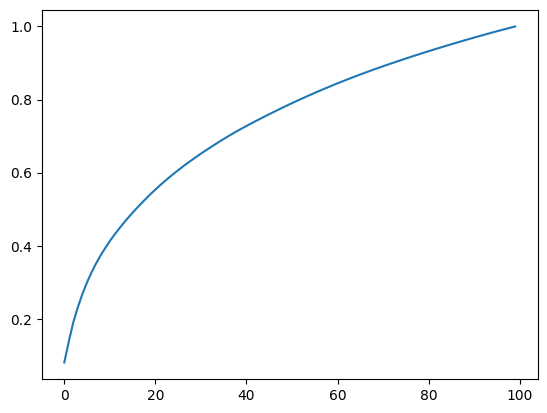

In [161]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))